In [144]:
######################
#Author: Vishal Arvin
#Date: 09/29/2023
######################

In [132]:
import numpy as np
import itertools
import mpmath
import random
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.max_rows', None)


alpha = 10**(-5)
lmbdas = [10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4)]
lmbdastr = ['10^(-4)','10^(-3)','10^(-2)','10^(-1)','10^(0)','10^(1)','10^(2)','10^(3)','10^(4)']

def Standardizing(D_matrix):
    D_mean = np.mean(D_matrix, axis = 0)
    D_matrix = D_matrix - np.array(D_mean, dtype=float)
    D_std = np.std(D_matrix, axis = 0)
    D_matrix = np.divide(D_matrix, np.array(D_std, dtype=float))
        
    return D_matrix

def YresponseCreator(y_Matrix):
    classDictionary = {0:'African' , 1:'European', 2:'EastAsian', 3:'Oceanian' , 4:'NativeAmerican'}
    Yresponse = []
    for i in range (len(y_Matrix)):
        yEachRow = []
        for j in range (len(classDictionary)):
            if y_Matrix[i] == classDictionary[j]:
                yEachRow.append(1)
            else:
                yEachRow.append(0)
        Yresponse.append(yEachRow)

    Yresponse = np.array(Yresponse)
    return Yresponse

def normalizedProbability(unNormalized):
    normProbability = []
    for i in range(len(unNormalized)):
        normProbabilityRow = []
        rowAddValue = np.sum(unNormalized[i])
        for j in range(len(unNormalized[i])):
            if rowAddValue != 0:
                valueProb = unNormalized[i][j] / rowAddValue
            else:
                valueProb = 0
            normProbabilityRow.append(valueProb)
        normProbability.append(normProbabilityRow)
    
    return normProbability
            
def zCreator(beeta):
    zMatrix = np.zeros((10,5))
    zMatrix = np.insert(zMatrix,0,beeta[0])
    return zMatrix.reshape(11,5)

def CVCalculator(batches, lmbda, alpha,matrix, response, Originalbeeta):    
    MSElist = []
    for z in range(len(batches)):
        validationset = []
        validationsetResponse = []
        trainingset = []
        trainingsetResponse = []
        beeta = Originalbeeta
        
        for i in batches[z][0]:
            validationset.append(matrix[i])
            validationsetResponse.append(response[i])
        for j in batches[z][1]:
            trainingset.append(matrix[j])
            trainingsetResponse.append(response[j])
    
        validationset = np.array(validationset)
        validationsetResponse = np.array(validationsetResponse)
        trainingset = np.array(trainingset)
        trainingsetResponse = np.array(trainingsetResponse)
        
        
        trainingsetmean = np.mean(trainingset, axis=0)
        trainingsetstd = np.nanstd(trainingset, axis=0)
        
        trainingset = np.divide((trainingset - trainingsetmean), trainingsetstd)
        trainingset = np.insert(trainingset, 0, 1, axis=1)
        validationset = np.divide((validationset - trainingsetmean), trainingsetstd)
        validationset = np.insert(validationset, 0, 1, axis=1)

        
        for i in range(10000):
            unNormalized = np.exp(np.dot(trainingset , beeta))
            normProbability = normalizedProbability(unNormalized)
            zMatrix = zCreator(beeta)
            beeta = beeta + np.multiply(alpha,(np.dot(np.transpose(trainingset),(trainingsetResponse - normProbability)) - np.multiply(2*lmbda,(beeta - zMatrix))))
    

        unNormalizedv = np.exp(np.dot(validationset , beeta))
        normProbability = np.array(normalizedProbability(unNormalizedv))
        

        yikNormprabability = validationsetResponse * (np.log10(normProbability))
        
        eachRowSum = np.sum(yikNormprabability,axis=1)
        oneValue = np.sum(eachRowSum,axis=0)
        cv = -(1/len(validationset)) * oneValue
        MSElist.append(cv)
        
    

        
     
    cvsum = sum(MSElist)
    CV = cvsum / len(batches)
    return CV



In [133]:
D_matrix = np.loadtxt("TrainingData_N183_p10.csv",skiprows=1,usecols=[0,1,2,3,4,5,6,7,8,9],delimiter=',') 
y_Matrix = np.loadtxt("TrainingData_N183_p10.csv",skiprows=1,usecols=[10],delimiter=',',dtype = object) 

D_matrix = np.array(D_matrix)
y_Matrix = np.array(y_Matrix)

D_matrixMean = np.mean(D_matrix, axis = 0)
testMatrix = D_matrix - D_matrixMean

D_matrix1 = np.array(D_matrix)

D_matrix = Standardizing(D_matrix)

D_matrix = np.insert(D_matrix, 0, 1, axis=1)

y_Matrix = YresponseCreator(y_Matrix)


In [134]:
beeta = np.zeros((11,5))

store_Beeta = ['lambda1','lambda2','lambda3','lambda4','lambda5','lambda6','lambda7','lambda8','lambda9']
for k in range(len(lmbdas)):
    store_Beeta[k] = []
    beetacopy = beeta 
    beetacopy = np.array(beetacopy)

    
    for i in range(10000):
        unNormalized = np.exp(np.dot(D_matrix , beetacopy))
        normProbability = normalizedProbability(unNormalized)
        zMatrix = zCreator(beetacopy)
        beetacopy = beetacopy + np.multiply(alpha,(np.dot(np.transpose(D_matrix),(y_Matrix - normProbability)) - np.multiply(2*lmbdas[k],(beetacopy - zMatrix))))
        
    store_Beeta[k].append(beetacopy)


In [135]:
classLables = ['class_1','class_2','class_3','class_4','class_5']
store_Beeta = np.array(store_Beeta)

for z in range(len(classLables)):
    classLables[z] = []
    for q in range(len(store_Beeta)):
        classLables[z].append(store_Beeta[q][0][:,z])
        

classLables = np.array(classLables)

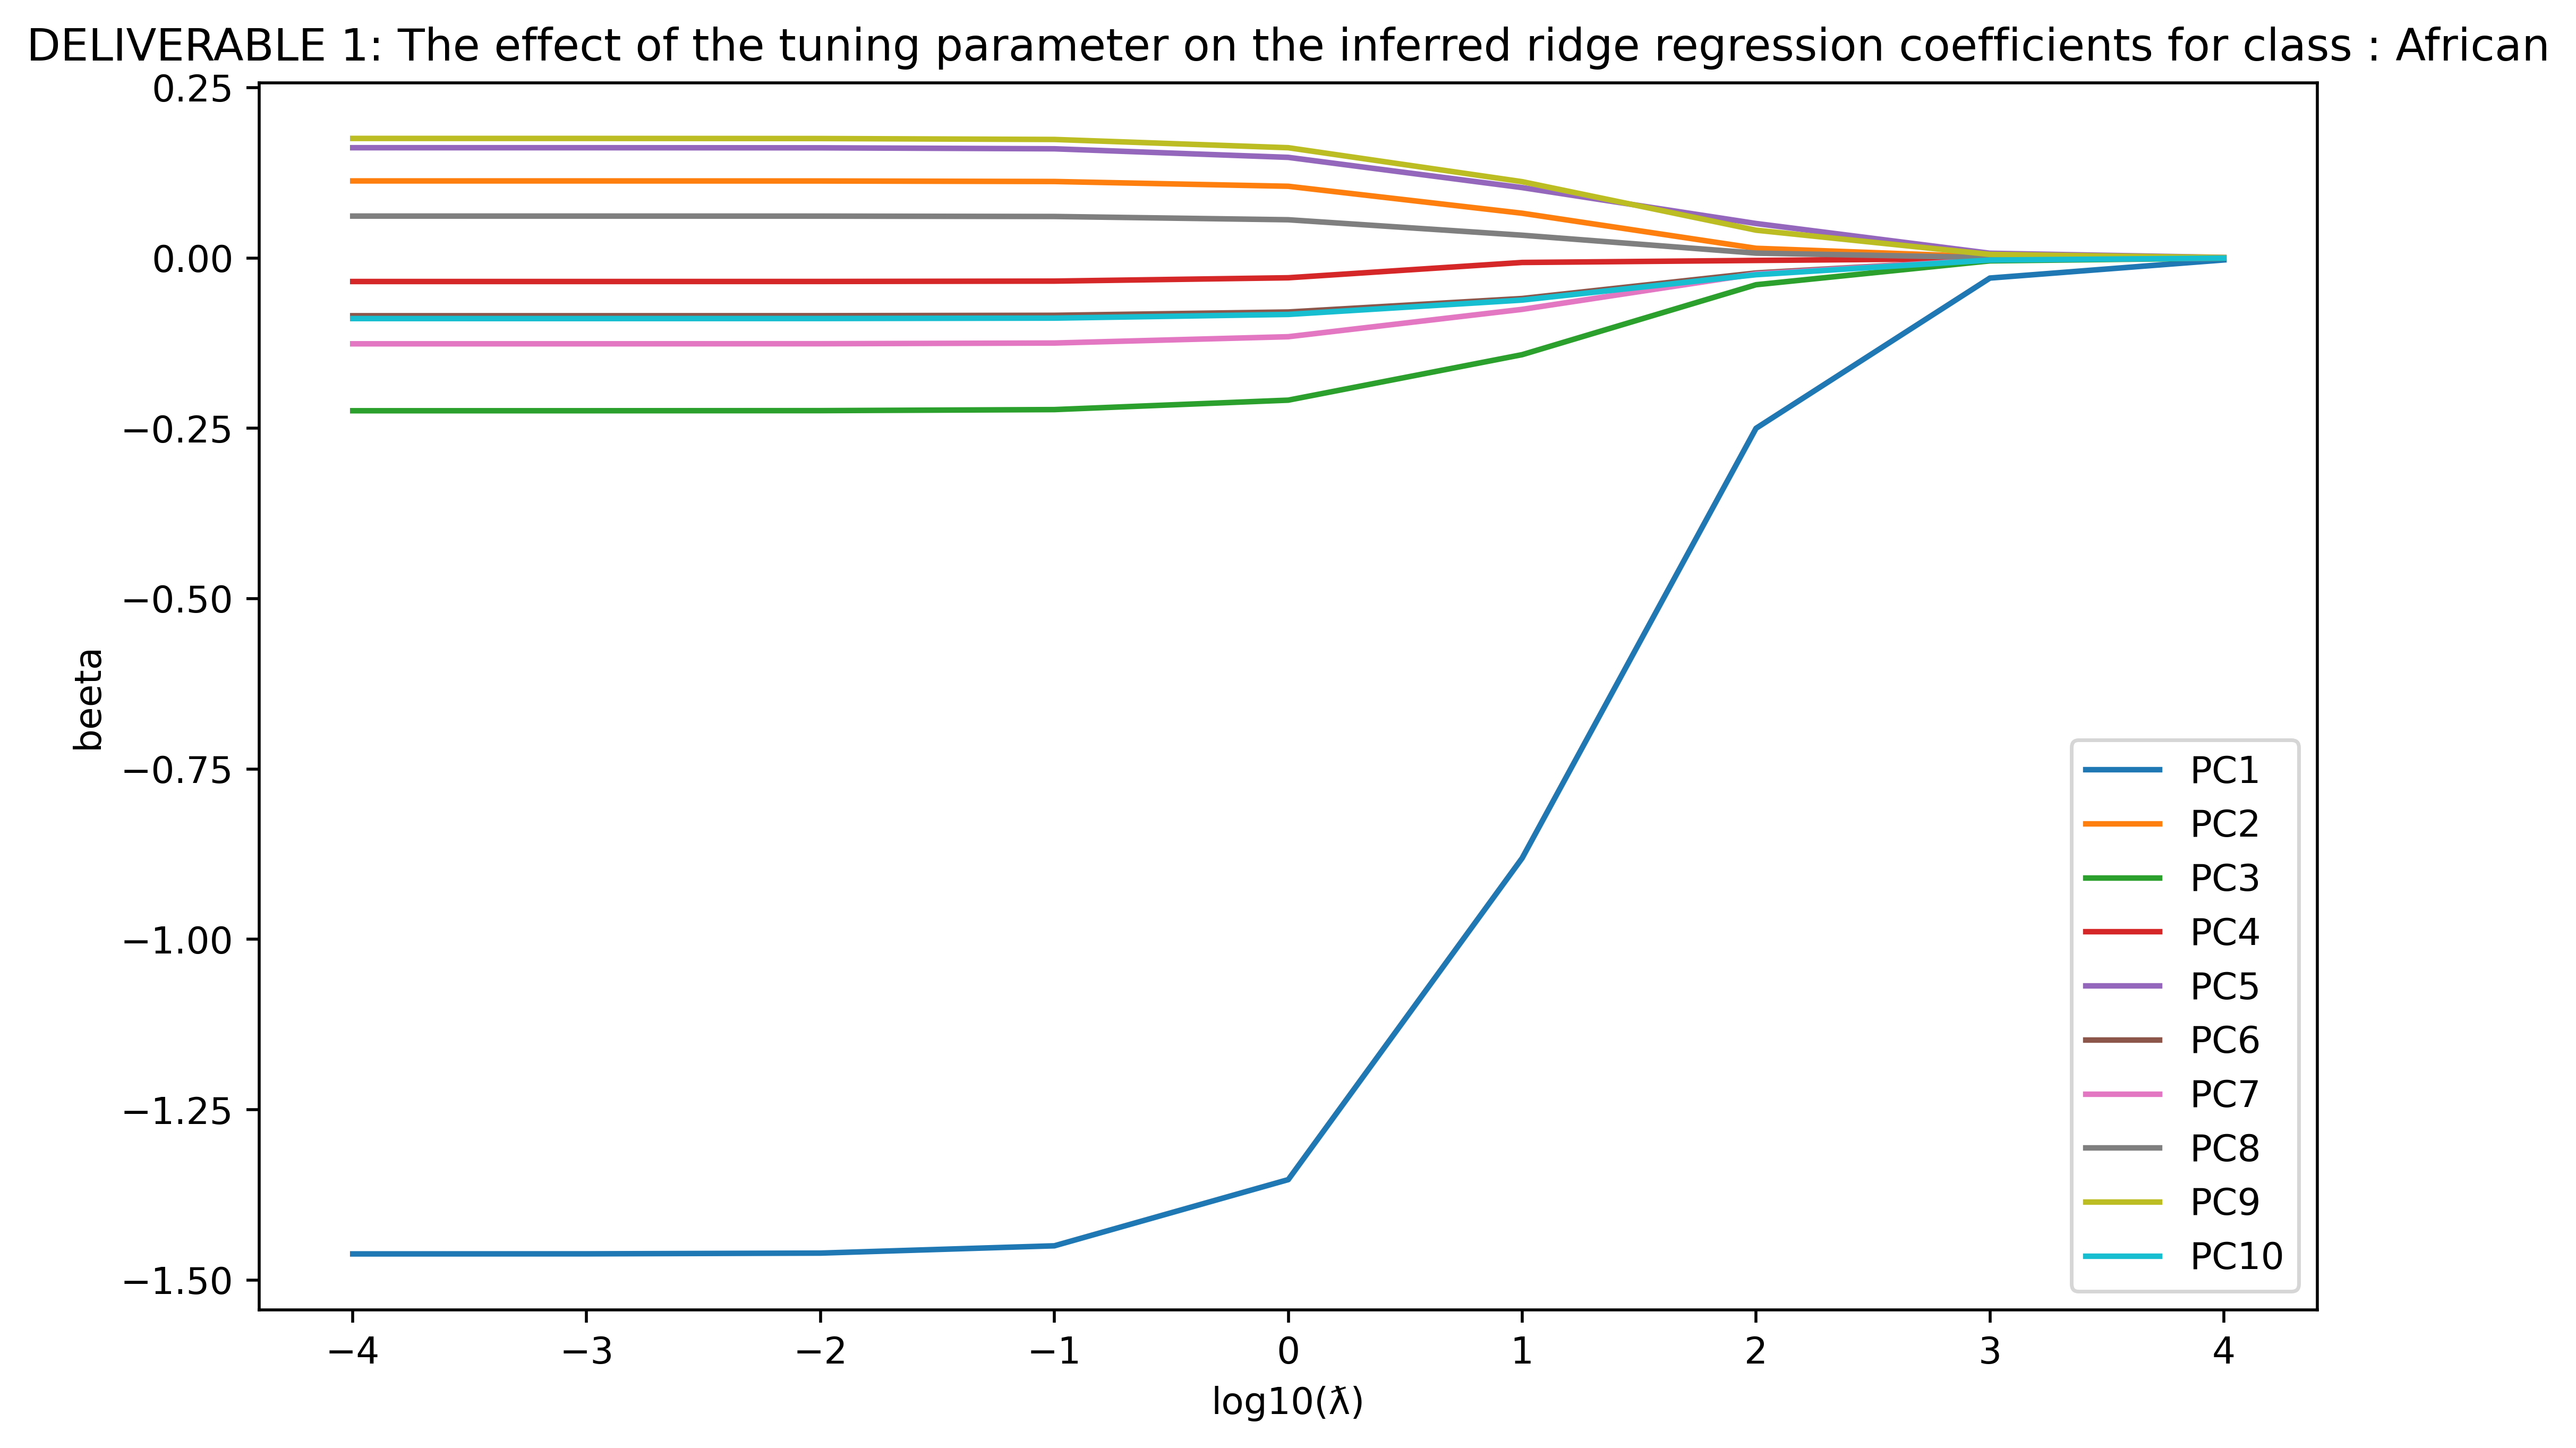

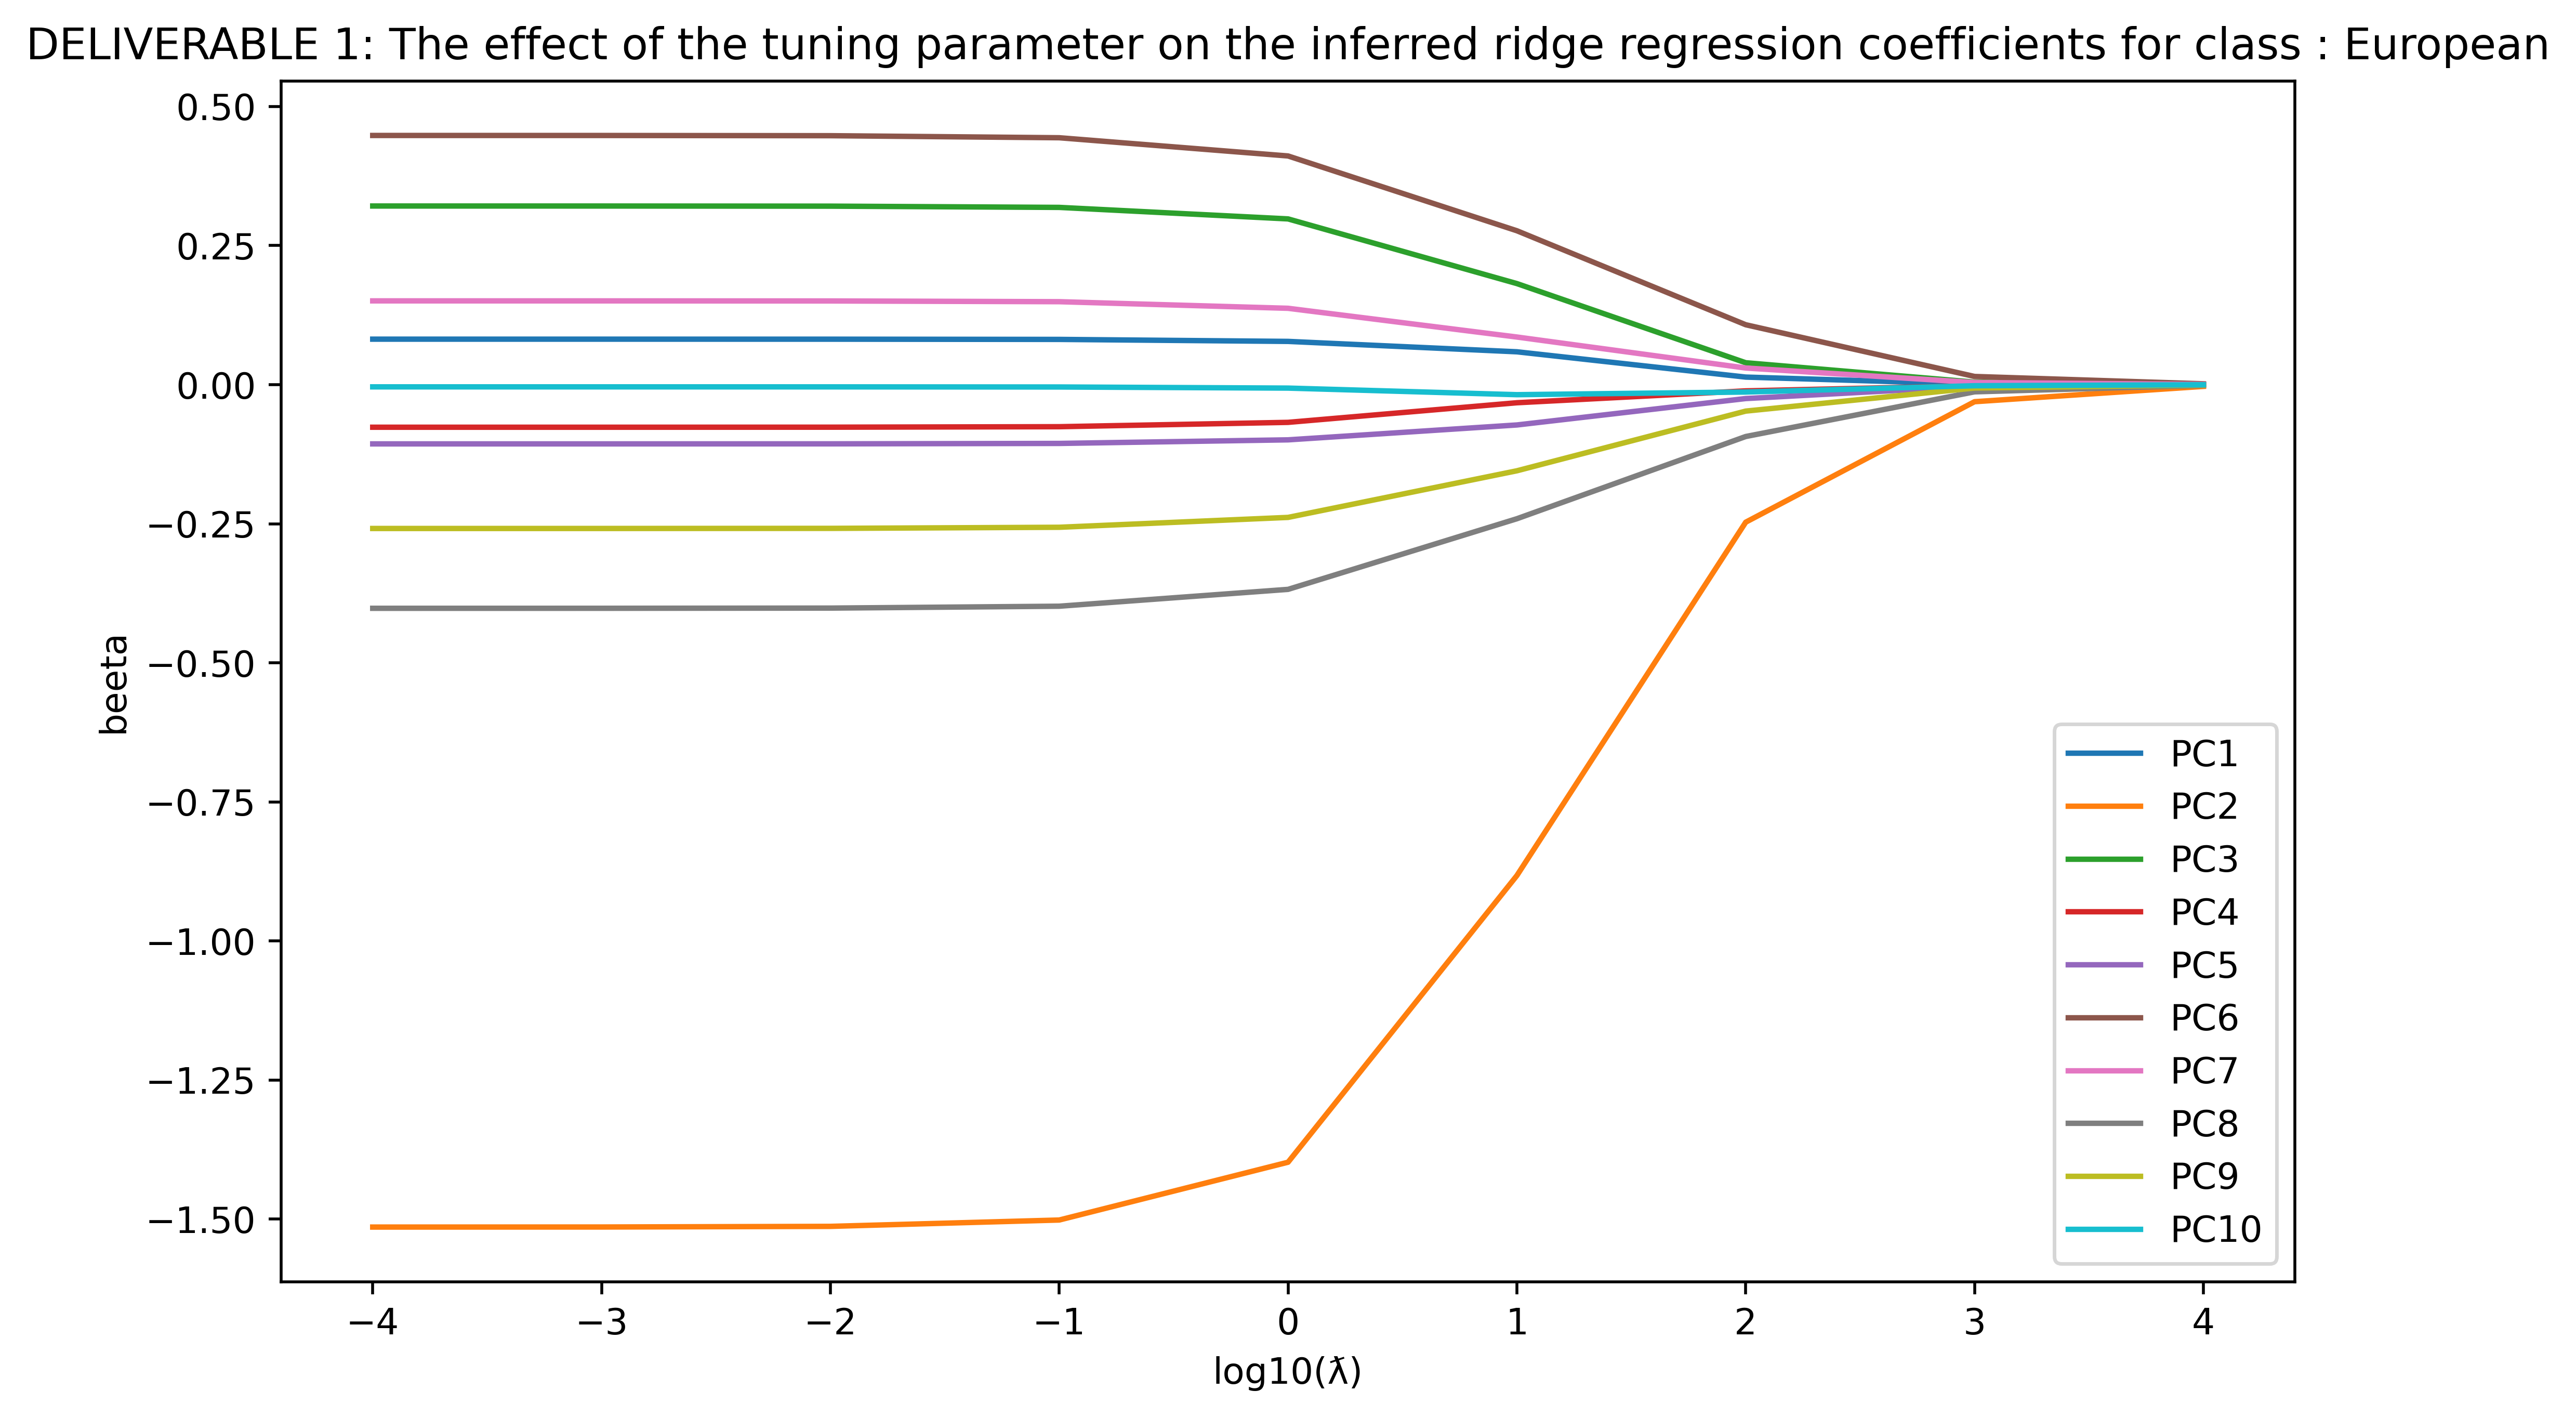

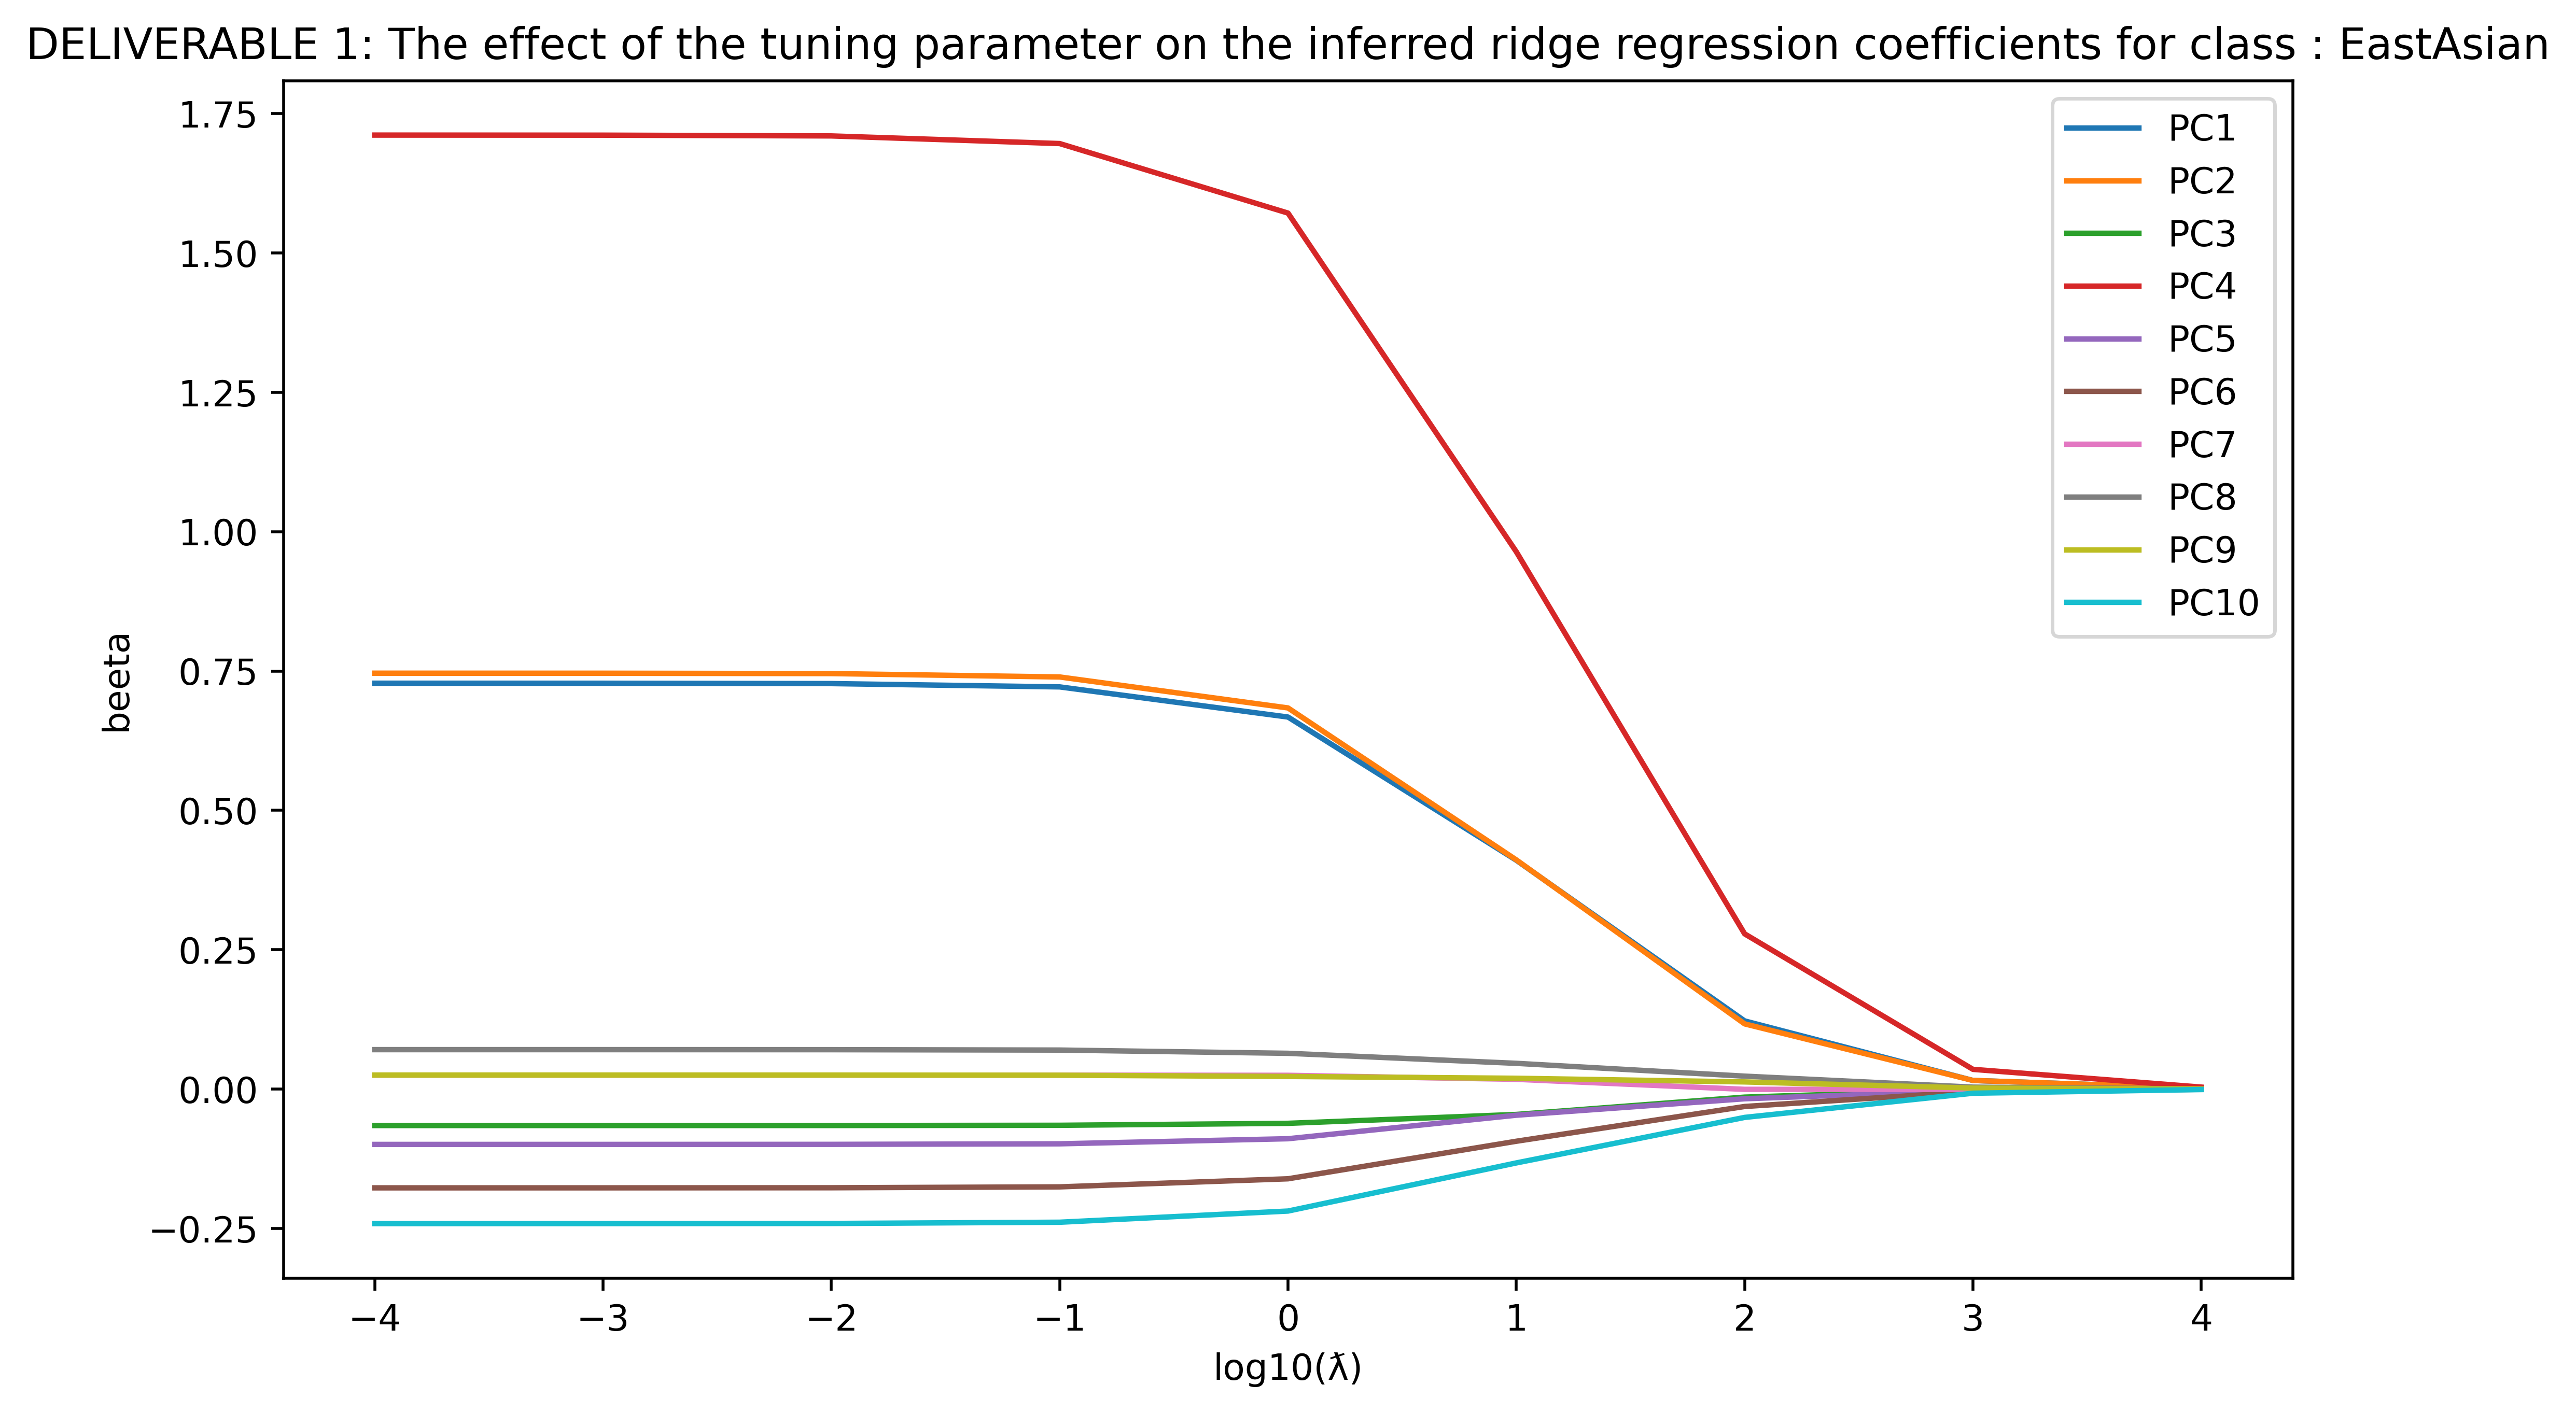

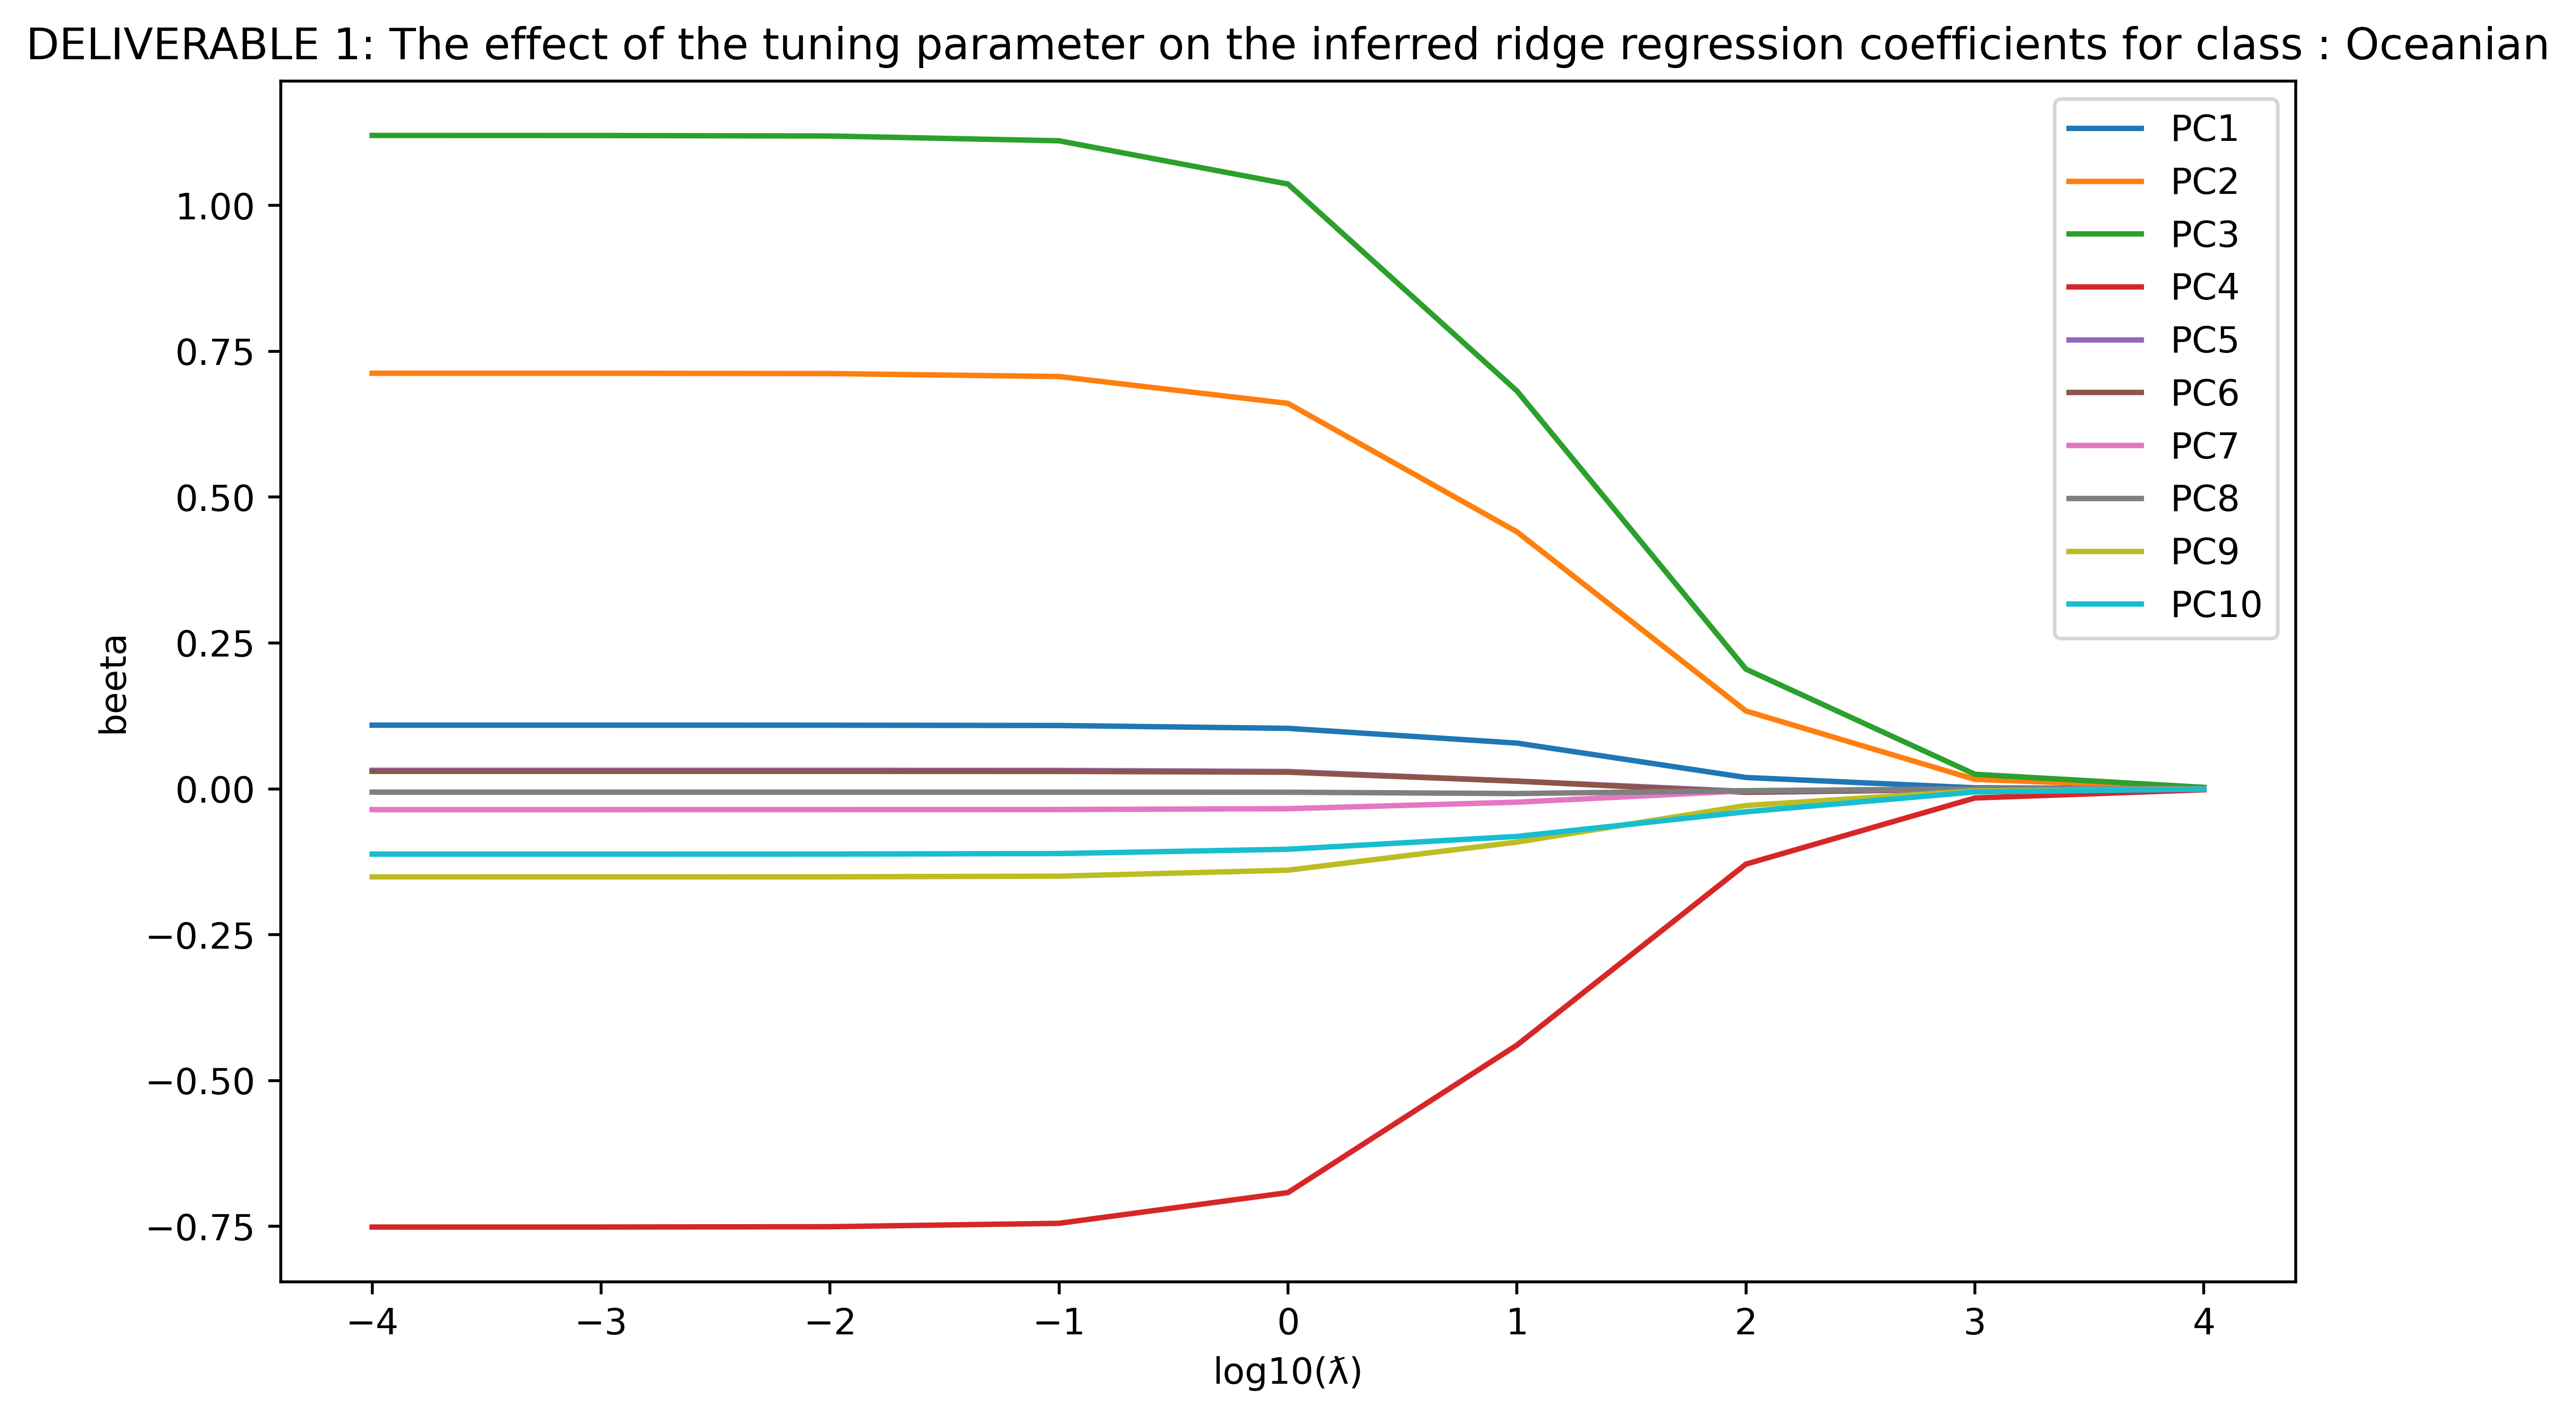

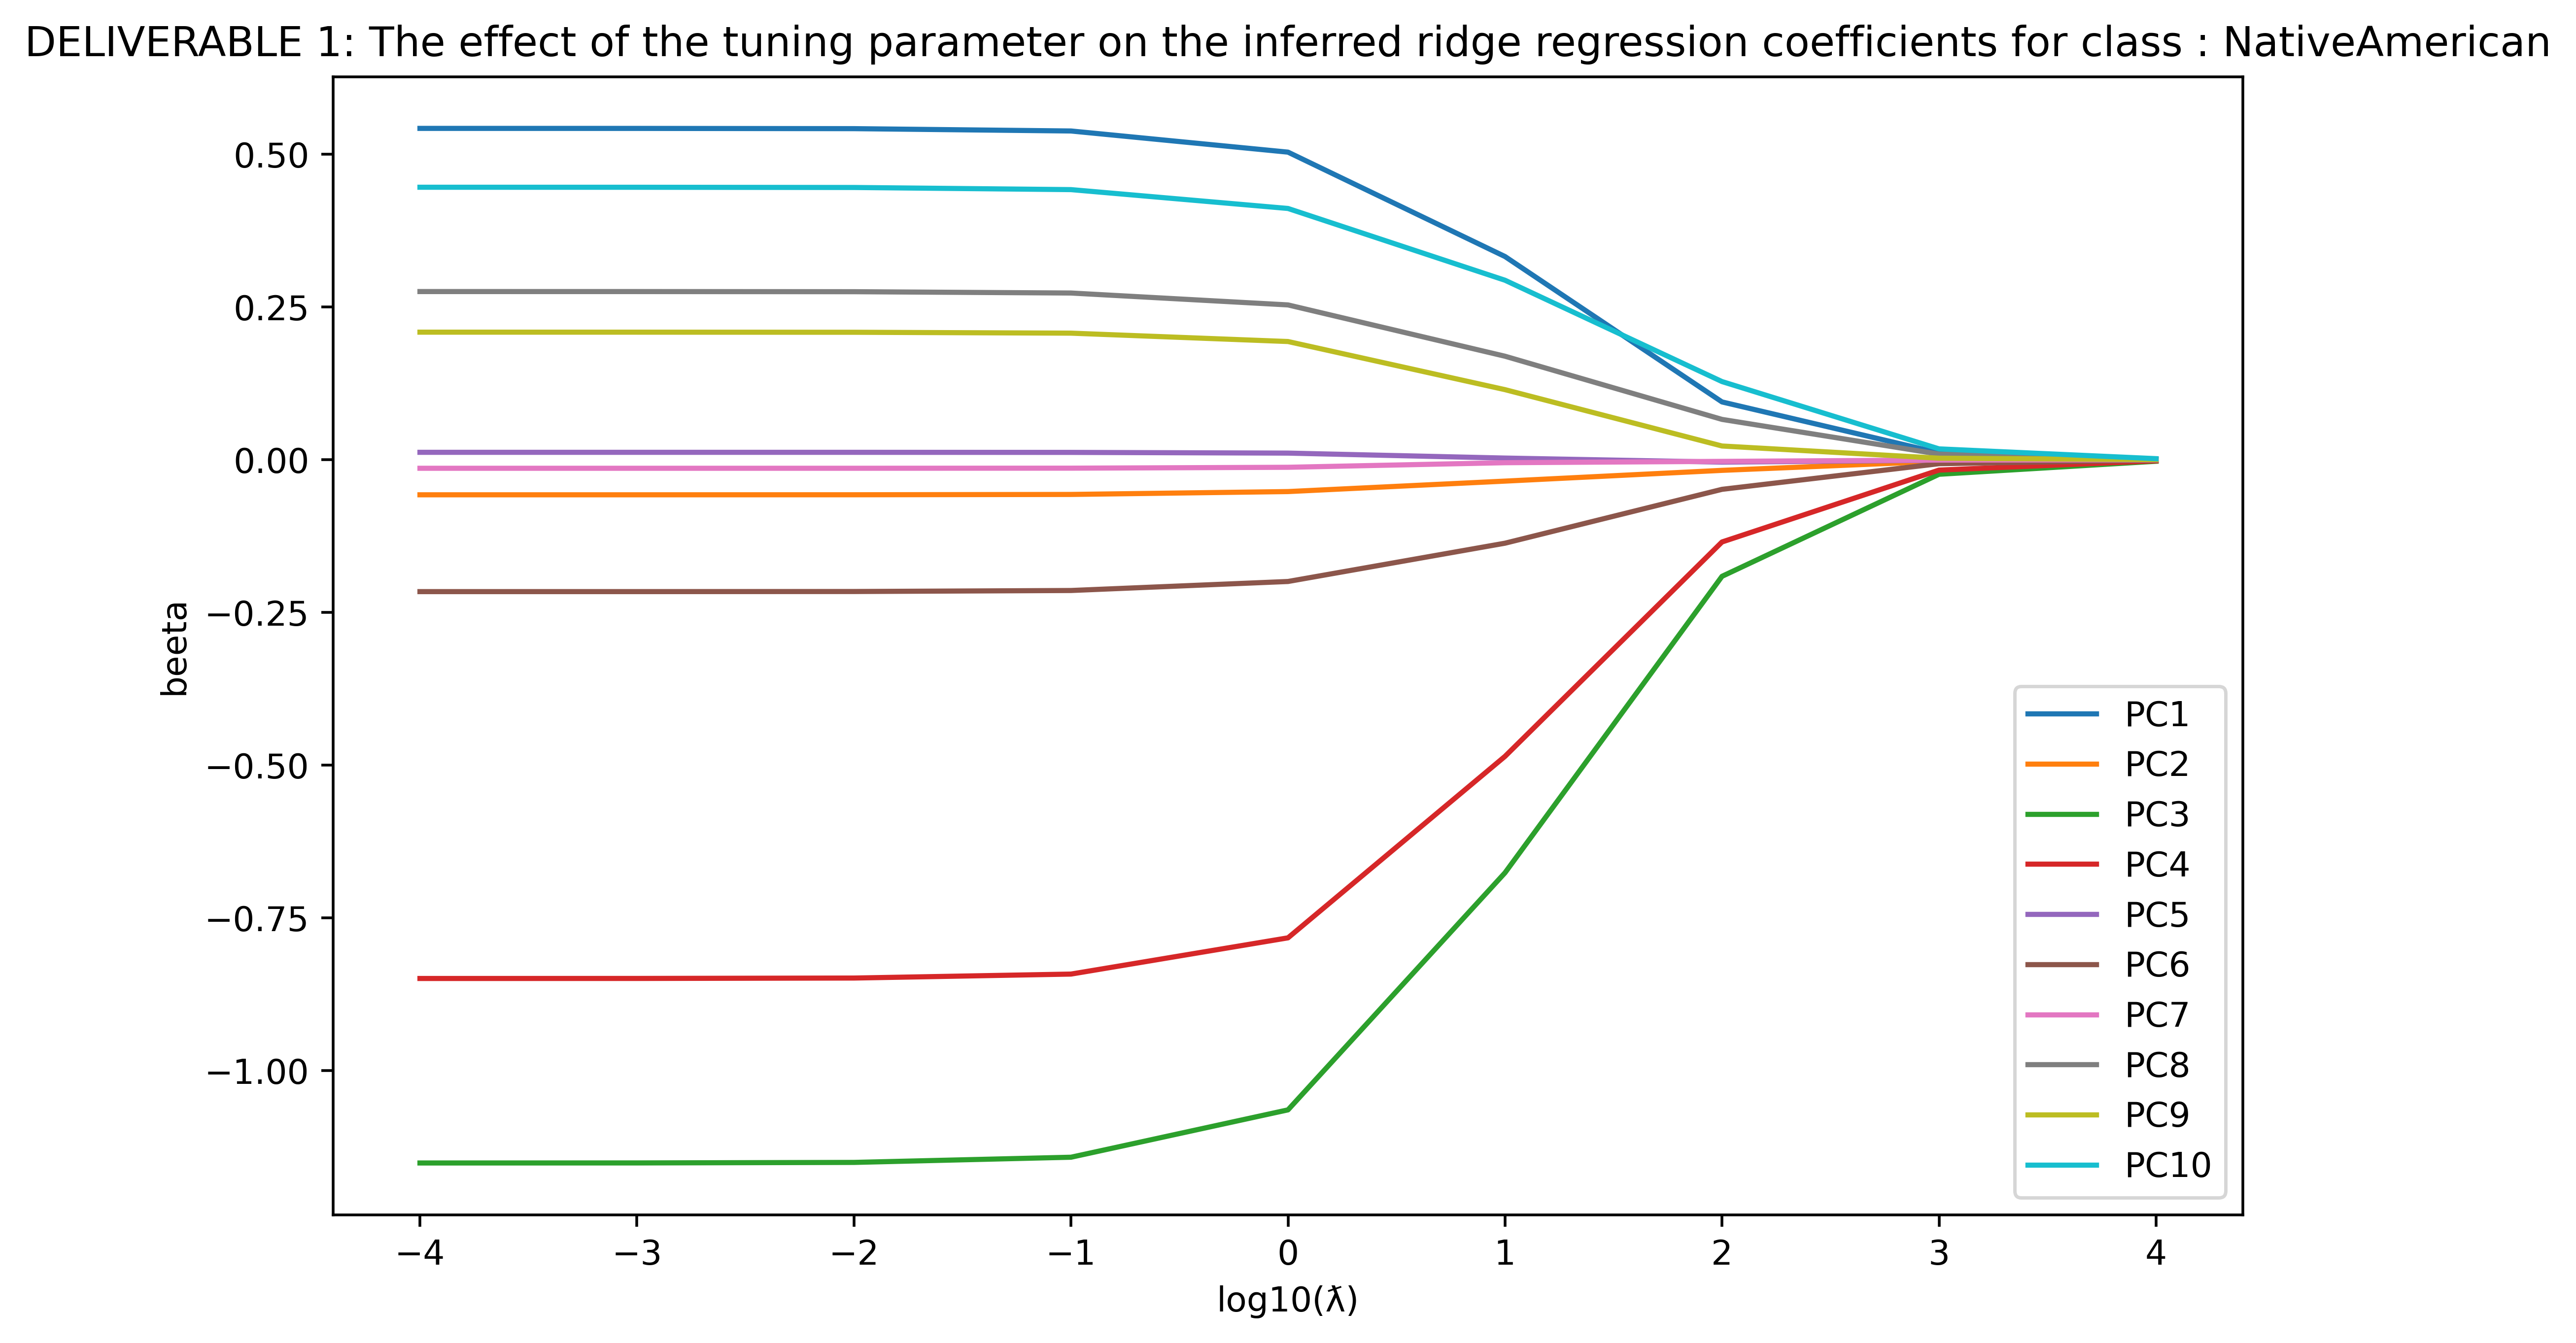

In [136]:
p_list = ['intercept','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
classDictionary = {0:'African' , 1:'European', 2:'EastAsian', 3:'Oceanian' , 4:'NativeAmerican'}
y = np.log10(lmbdas)
x = np.arange(-1,1)
count = 1
for i in range(len(classLables)):
    #beta_0 = classLables[i][:,0]  # Placeholder for beta_0 values
    beta_1 = classLables[i][:,1]  # Placeholder for beta_1 values
    beta_2 = classLables[i][:,2]  # Placeholder for beta_2 values
    beta_3 = classLables[i][:,3]  # Placeholder for beta_3 values
    beta_4 = classLables[i][:,4]  # Placeholder for beta_4 values
    beta_5 = classLables[i][:,5]  # Placeholder for beta_5 values
    beta_6 = classLables[i][:,6]  # Placeholder for beta_6 values
    beta_7 = classLables[i][:,7]  # Placeholder for beta_7 values
    beta_8 = classLables[i][:,8]  # Placeholder for beta_8 values
    beta_9 = classLables[i][:,9]
    beta_10 = classLables[i][:,10]

    plt.figure(figsize=(10,6),dpi=500)

    #plt.plot(y,beta_0,label = p_list[0])
    plt.plot(y,beta_1,label = p_list[1])
    plt.plot(y,beta_2,label = p_list[2])
    plt.plot(y,beta_3,label = p_list[3])
    plt.plot(y,beta_4,label = p_list[4])
    plt.plot(y,beta_5,label = p_list[5])
    plt.plot(y,beta_6,label = p_list[6])
    plt.plot(y,beta_7,label = p_list[7])
    plt.plot(y,beta_8,label = p_list[8])
    plt.plot(y,beta_9,label = p_list[9])
    plt.plot(y,beta_10,label = p_list[10])

    plt.xlabel("log10(ƛ)") 
    plt.ylabel("beeta")
    plt.title(f'DELIVERABLE 1: The effect of the tuning parameter on the inferred ridge regression coefficients for class : {classDictionary[i]}')
    plt.legend()

    # Show the plot
    plt.show()

In [137]:
#5 fold cross validation part

indices = list(itertools.chain(range(0,len(D_matrix))))
random.shuffle(indices)

N= len(D_matrix)

b1 = indices[0:int((N/5))]
b2 = indices[int(N/5):int(((2*N)/5))]
b3 = indices[int((2*N)/5):int(((3*N)/5))]
b4 = indices[int((3*N)/5):int(((4*N)/5))]
b5 = indices[int((4*N)/5):int(((5*N)/5))]


batch1 = [b1,b2+b3+b4+b5]
batch2 = [b2,b1+b3+b4+b5]
batch3 = [b3,b2+b1+b4+b5]
batch4 = [b4,b2+b3+b1+b5]
batch5 = [b5,b2+b3+b4+b1]

batches = [batch1,batch2,batch3,batch4,batch5]
cvValueList = []
for lmbda in lmbdas:
    cvValueList.append(CVCalculator(batches, lmbda, alpha, D_matrix1, y_Matrix, beeta))
    


In [138]:
print(cvValueList)

[0.04557303731822689, 0.045582563511719895, 0.04567785882527473, 0.04663409485033419, 0.05647136618211882, 0.1528027584438851, 0.4869282444629085, 0.6622243856576888, 0.6855993709071122]


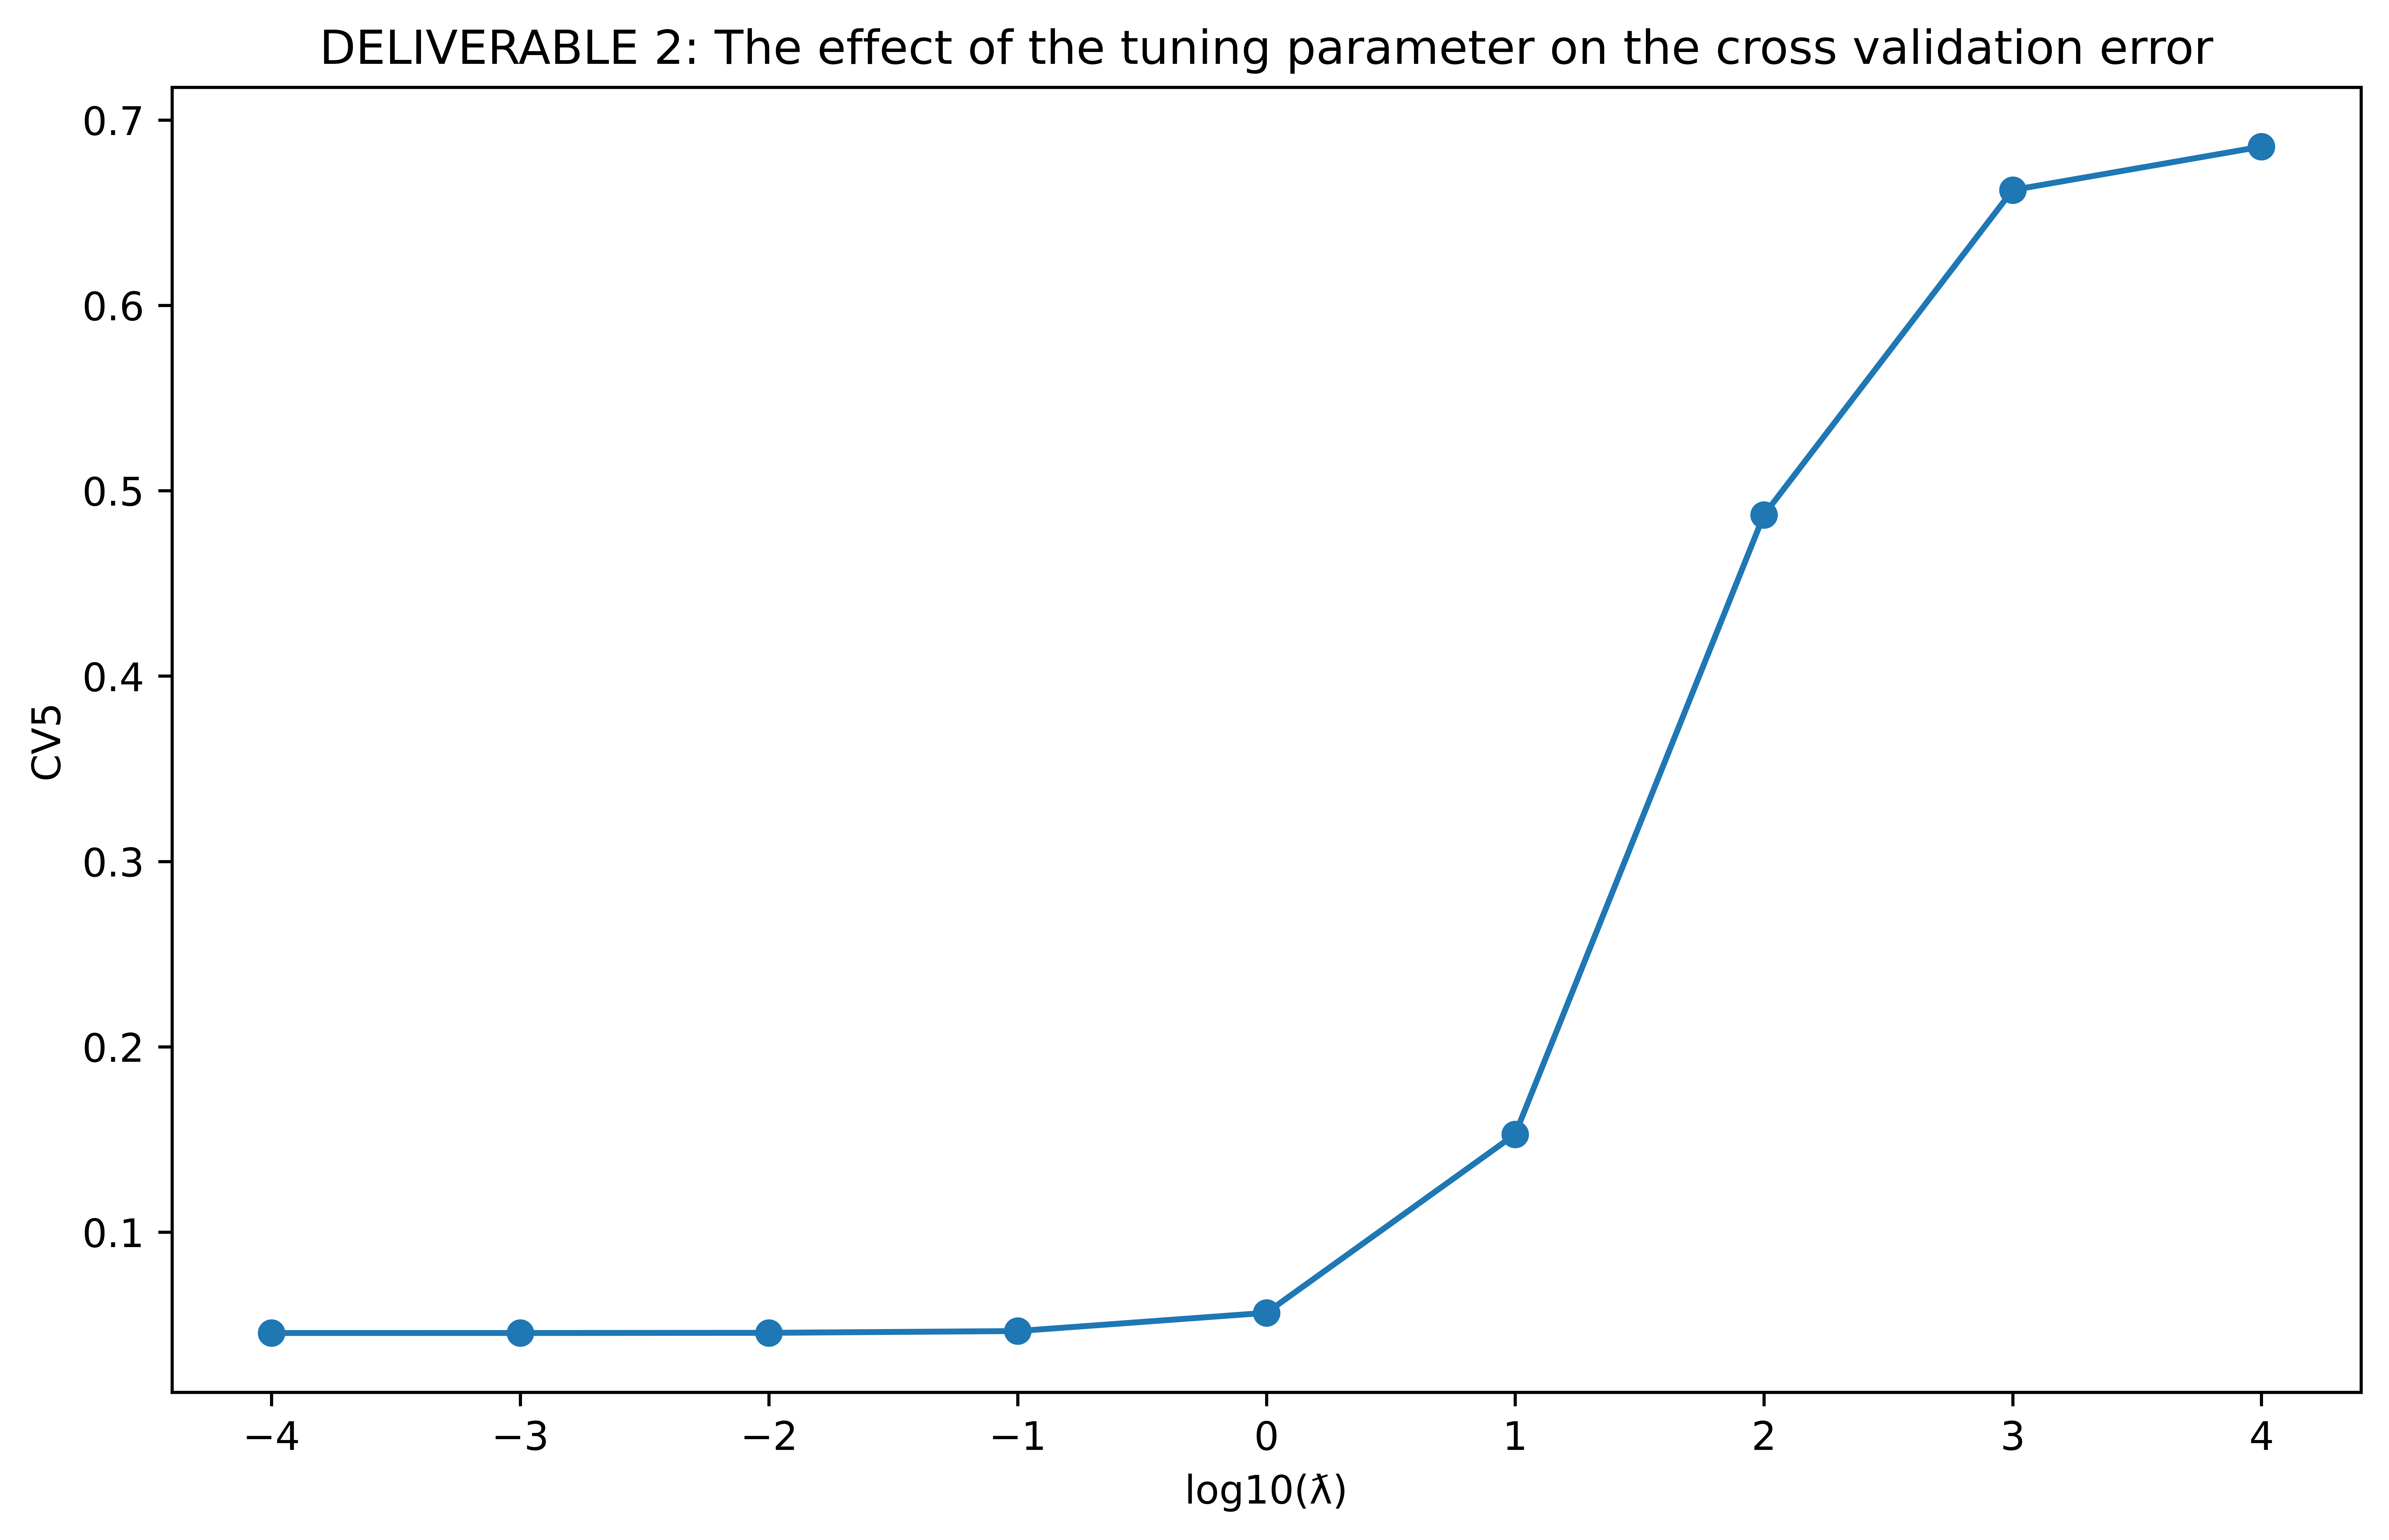

In [139]:
x = np.log10(lmbdas)
y = cvValueList

plt.figure(figsize=(10,6),dpi=1000)
plt.plot(x,y,label = "CV5",marker='o')

plt.xlabel("log10(ƛ)")  

plt.ylabel("CV5")

plt.title('DELIVERABLE 2: The effect of the tuning parameter on the cross validation error')

# Show the plot
plt.show()

In [140]:
minTuning = cvValueList.index(min(cvValueList))
print(f"DELIVERABLE 3: 𝜆 value that generated the smallest CV(5) error: {lmbdas[minTuning]} or {lmbdastr[minTuning]}")

DELIVERABLE 3: 𝜆 value that generated the smallest CV(5) error: 0.0001 or 10^(-4)


In [141]:
T_matrix = np.loadtxt("TestData_N111_p10.csv",skiprows=1,usecols=[0,1,2,3,4,5,6,7,8,9],delimiter=',') 

T_matrix = np.array(T_matrix)

T_matrix = T_matrix - np.array(D_matrixMean, dtype=float)
T_matrixStd = np.std(testMatrix, axis = 0)
T_matrix = np.divide(T_matrix, np.array(T_matrixStd, dtype=float))

T_matrix = np.insert(T_matrix, 0, 1, axis=1)

tUnormalized = np.exp(np.dot(T_matrix, store_Beeta[minTuning]))

tNormProbability = normalizedProbability(tUnormalized)

tNormProbability = np.array(tNormProbability)


ancestryList = []
highestProbability = []
for cl in range(len(tNormProbability)):
    highestProbability.append(tNormProbability[cl][0][np.argmax(tNormProbability[cl])])
    ancestryList.append(classDictionary [np.argmax(tNormProbability[cl])])
    
    
ancestryList = np.array(ancestryList,dtype = object)
highestProbability = np.array(highestProbability,dtype = object)


In [142]:
TestResponse = []


for j in range(len(tNormProbability)):
    TestResponse.append(np.insert(np.array(tNormProbability[j],dtype = object),5,ancestryList[j]))
    TestResponse[j] = np.append(TestResponse[j],highestProbability[j])


TestResponse = np.array(TestResponse,dtype = object)


In [143]:
from IPython.display import display
TestResponse = pd.DataFrame(TestResponse,columns= ['African','European','EastAsian','Oceanian','NativeAmerican','Probable Class','Max Probability'])
print("DELIVERABLE 4 : Retrained the entire model, using the optimal tuning parameter\n")
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
display(TestResponse)


DELIVERABLE 4 : Retrained the entire model, using the optimal tuning parameter



,African,European,EastAsian,Oceanian,NativeAmerican,Probable Class,Max Probability
0,0.007715,0.006058,0.004997,0.976723,0.004507,Oceanian,0.976723
1,0.001904,0.008963,0.003108,0.002771,0.983254,NativeAmerican,0.983254
2,0.011421,0.933175,0.037111,0.011092,0.007202,European,0.933175
3,0.931129,0.009217,0.005807,0.045133,0.008714,African,0.931129
4,0.002697,0.001248,0.99001,0.001625,0.00442,EastAsian,0.99001
5,0.015112,0.079423,0.003566,0.005345,0.896555,NativeAmerican,0.896555
6,0.029104,0.206494,0.011181,0.026396,0.726826,NativeAmerican,0.726826
7,0.02457,0.100997,0.020876,0.012287,0.841271,NativeAmerican,0.841271
8,0.059845,0.256399,0.032232,0.022246,0.629278,NativeAmerican,0.629278
9,0.057918,0.338858,0.032714,0.017481,0.553029,NativeAmerican,0.553029


# Deliverable 5-

How do the class lablel probabilities differ for mexican and african american samples when compared with unknown samples? Are these class probabilities telling us something about the recent history, and explain why these probabilities are reasonable with respect to the knowledge of recent history?

On comparing the response in the testing dataset and the model output the following observations are made:<br>
1.) the testing dataset responses had 5 unknown values for which the trained model got 5 different responses<br>
2.) For all the mexican responses in the testing dataset the trained model gave European and NativeAmerican as the response.<br>
3.)For all the AfricanAmerican responses in the testing dataset the trained model gave African as the response.<br>

From the above observation we can say that,the class probabilities derived from genetic markers are reasonable to knowledge of recent history because of the relationship between genetics and historical events.<br>

These increased probabilities could denote a more comparable genetic resemblance or higher representation of certain genetic markers typically found in those samples, and where as the Lower probabilities across specific classes in the unknown samples might exhibit a lack of precise genetic association with any predominant ancestral group or a mix of multiple ancestries not strongly represented in the model.<br>


The History behind Mexican people having European and NativeAmerican Ancestry is due to Mestizos which means mixed race, and for Mexico to develop, its citizens must become mestizos. The government embraced and supported the mestizo philosophy following the Mexican Revolution to forge a single, racially inclusive Mexican identity. Racial identities other than "indigenous" vanished from Mexican census data by 1930.<br>

The History behing AfricanAmerican having African ancestry is due to, Africans from West and Central Africa were sold to European slave traders in the 16th century, and they were then brought over the Atlantic to the Western Hemisphere, marking the beginning of African-American history. They were bought as enslaved people by European settlers and forced to labor on plantations after they arrived in the Americas, especially in the southern regions. Before and after the American Revolution, a few people created autonomous villages after escaping or becoming free through manumission. The majority of Black Americans remained under slavery after the country was built in 1783, with the majority of them concentrated in the American South. Four million enslaved people were freed only during and after the Civil War, which ended in 1865. They obtained citizenship and the right to vote during Reconstruction.<br>
